# Data Analysis (v1, 05/11/20)
Initial Data Analysis<br>
Kaela Olsen<br>
Version 1<br>
05/11/20

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter

%env SPOTIPY_CLIENT_ID = 3543bc68b7a64fa4896cb0c1d2499e33
%env SPOTIPY_CLIENT_SECRET = b711f5fe2e9a417c89247f7036c9c069

sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials())

env: SPOTIPY_CLIENT_ID=3543bc68b7a64fa4896cb0c1d2499e33
env: SPOTIPY_CLIENT_SECRET=b711f5fe2e9a417c89247f7036c9c069


In [3]:
tracks = pd.read_csv("tracks_list.csv")

In [4]:
tracks_count = tracks.sort_values(by=['count'], ascending=False)

In [5]:
tracks_count.head()

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4


As you can see, the top five songs of quarantine are 'Toosie Slide' by Drake, 'Sunday Best' by Surfaces, 'death bed' by Powfu and beabadoobee, 'Don't Start Now' by Dua Lipa, and 'The Box' by Roddy Rich. These five songs are all on the US Top 50 tracks charts list as of May 11th, 2020. It seems like the top songs of quarantine have more to do with what songs are trending and less to do with the emotional, physical, and mental circumstances of quarantine.
<br>
<br>
We wonder if this stays true for the rest of the songs, aside from the top 5 songs. Are the songs of quarantine just the songs of the time period of quarantine, or the songs of our emotional state in quarantine? Let's see what the top 20 look like.

In [6]:
tracks_count[:20]

,Unnamed: 0,uri,count,name,release_date,popularity,explicit,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
119,221,spotify:track:127QTOFJsJQp5LbJbu3A1y,176,Toosie Slide,2020-04-03,99,True,0.834,0.454,1,...,0.000006,0.1140,0.837,81.618,audio_features,127QTOFJsJQp5LbJbu3A1y,https://api.spotify.com/v1/tracks/127QTOFJsJQp...,https://api.spotify.com/v1/audio-analysis/127Q...,247059,4
146,259,spotify:track:1Cv1YLb4q0RzL6pybtaMLo,172,Sunday Best,2019-01-06,96,False,0.878,0.525,5,...,0.000000,0.0714,0.694,112.022,audio_features,1Cv1YLb4q0RzL6pybtaMLo,https://api.spotify.com/v1/tracks/1Cv1YLb4q0Rz...,https://api.spotify.com/v1/audio-analysis/1Cv1...,158571,4
1002,2564,spotify:track:7eJMfftS33KTjuF7lTsMCx,155,death bed (coffee for your head) (feat. beabad...,2020-02-08,99,False,0.726,0.431,8,...,0.000000,0.6960,0.348,144.026,audio_features,7eJMfftS33KTjuF7lTsMCx,https://api.spotify.com/v1/tracks/7eJMfftS33KT...,https://api.spotify.com/v1/audio-analysis/7eJM...,173333,4
116,218,spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg,151,Don't Start Now,2019-10-31,97,False,0.794,0.793,11,...,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,https://api.spotify.com/v1/tracks/6WrI0LAC5M1R...,https://api.spotify.com/v1/audio-analysis/6WrI...,183290,4
1006,2569,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,147,The Box,2019-12-06,99,True,0.896,0.586,10,...,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653,4
1753,6284,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,139,Blinding Lights,2020-03-20,100,False,0.514,0.730,1,...,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
118,220,spotify:track:0sf12qNH5qcw8qpgymFOqD,136,Blinding Lights,2019-11-29,93,False,0.513,0.796,1,...,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573,4
144,257,spotify:track:3Dv1eDb0MEgF93GpLXlucZ,133,Say So,2019-11-07,97,True,0.787,0.673,11,...,0.000004,0.0904,0.786,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,https://api.spotify.com/v1/tracks/3Dv1eDb0MEgF...,https://api.spotify.com/v1/audio-analysis/3Dv1...,237893,4
846,1723,spotify:track:6K4t31amVTZDgR3sKmwUJJ,132,The Less I Know The Better,2015-07-17,86,True,0.640,0.740,4,...,0.006780,0.1670,0.785,116.879,audio_features,6K4t31amVTZDgR3sKmwUJJ,https://api.spotify.com/v1/tracks/6K4t31amVTZD...,https://api.spotify.com/v1/audio-analysis/6K4t...,216320,4
433,809,spotify:track:4nK5YrxbMGZstTLbvj6Gxw,130,Supalonely,2019-11-15,95,True,0.863,0.631,7,...,0.000030,0.1230,0.817,128.977,audio_features,4nK5YrxbMGZstTLbvj6Gxw,https://api.spotify.com/v1/tracks/4nK5YrxbMGZs...,https://api.spotify.com/v1/audio-analysis/4nK5...,223480,4


On May 11th, the only songs in the top 20 of our data set that weren't on the US Top 50 list were "Toxic", 'Tongue Tied' and 'U Can't Touch This'. However, every other song was on the US Top 50 list. It is interesting to note the disproportional popularity of "Toxic" and "U Can't Touch This." Both songs are very fitting for the Coronavirus pandemic, and the enforced social distancing and self-quarantine because of it.

**Is there a way to write a function that compares the top 20 (or even top 50) of this list and the top 50 in the US? I think we could do this... we would just need to know how to scrape the Spotify US Top 50 playlist.** 

In [81]:
top_songs = spotify:playlist:37i9dQZF1DXcz8eC5kMSWZ
sp = spotipy.Spotify()


artist = sp.artist(urn)
print(artist)

spotify:playlist:37i9dQZF1DXcz8eC5kMSWZ

SyntaxError: invalid syntax (<ipython-input-81-09bde837006d>, line 1)

In [ ]:
spotify:playlist:37i9dQZF1DXcz8eC5kMSWZ

The top 200 charts on the global 2019 Spotify rankings were as follows at the end of 2019 (As of December 26th, 2019).

In [8]:
top_charts_2019 = pd.read_csv("top_charts.csv")

In [9]:
top_charts_2019.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Note that these figures are generated using a formula that protects against any artificial inflation of chart positions.,Unnamed: 4
0,Position,Track Name,Artist,Streams,URL
1,1,Dance Monkey,Tones And I,47797217,https://open.spotify.com/track/1rgnBhdG2JDFTbY...
2,2,All I Want for Christmas Is You,Mariah Carey,45828931,https://open.spotify.com/track/0bYg9bo50gSsH3L...
3,3,Last Christmas,Wham!,37725693,https://open.spotify.com/track/2FRnf9qhLbvw8fu...
4,4,ROXANNE,Arizona Zervas,32309199,https://open.spotify.com/track/696DnlkuDOXcMAn...


In [10]:
# #filters important variables, makes the dataframe usable
# def filter_data(x):
#     data = sp.track(x['uri'])
#     #sets data variable for each track
    
#     name = data['name']
#     pop = data['popularity']
#     date = data['album']['release_date']
#     explic = data['explicit']
    
#     features = sp.audio_features(x['uri'])
#     #uses spotify function to access audio features
    
#     return {**x, 
#             "name" : name, 
#             'release_date': date, 
#             "popularity" : pop,
#             'explicit' : explic, 
#             **features[0]}

In [11]:
# top_charts_2019 = top_charts_2019.apply(lambda x: filter_data(x), axis=1, result_type='expand')

So now, we want to know if the music we listen to during quarantine, or the songs we consider "quarantine songs" according to the playlists we make for them, are selected more as a result of their popularity or of actual quarantine. Thankfully, Spotify gives us a metric to measure popularity.

So to answer this question, we will see if there is a correlation between a track's popularity level, and the number of times they appear in a quarantine playlist.

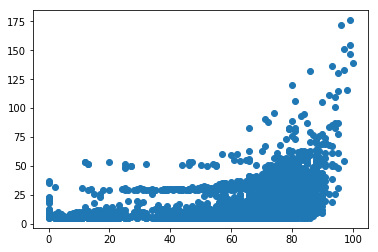

In [12]:
plt.scatter(tracks['popularity'], tracks['count'])
plt.show()

There seems to be a clear positive relationship with these two variables. However, it doesn't seem exactly linear. We are interested in understanding the strength of correlation between these two variables. We'll use a variant called rank correlation, where each element of a vector has a rank.  

Rank correlation (or Spearman correlation) is very similar to regular correlation (also called Pearson correlation), but it is more robust to relationships that aren't linear. Pearson correlation is to rank correlation as mean is to median. In both cases we can replace the actual value in an array with its *rank* in the array. The median is the value that has the mean rank (ie the midpoint), while the rank correlation is the Pearson correlation between the rank of $X_i$ and the rank of $Y_i$.

The following code defines datapoints that nearly lie on a line and calculates the slope of a regression line fit to the data.

In [13]:
linear_model = LinearRegression().fit(tracks[['popularity']], tracks[['count']])
print("Linear model slope:", round(float(linear_model.coef_[0]),4))

Linear model slope: 0.2205


Now let's see the correlation of:
1. the track counts and the track popularity
2. the *ranks* of the track counts and the *ranks* of the tracks popularity

In [14]:
corrcoef = np.corrcoef(tracks['popularity'], tracks['count'])[0][1]
rank_corrcoef = np.corrcoef(tracks['popularity'].rank(), tracks['count'].rank())[0][1]
print('Correlation:', round(corrcoef, 4))
print('Correlation of ranks:', round(rank_corrcoef,4))
spearman_r = spearmanr(tracks['popularity'], tracks['count'])
print('Spearman r: {:.4f}'.format(spearman_r.correlation))

Correlation: 0.2644
Correlation of ranks: 0.4717
Spearman r: 0.4717


As we can see, the correlation of ranks is much higher than the linear correlation.

It would be useful to understand the overall appearances of each song. We can use basic stats to help us understand this.

In [15]:
tracks['count'].describe()

count    8944.000000
mean       11.926431
std        11.723794
min         5.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       176.000000
Name: count, dtype: float64

The most appearances a song has is 176, and the least, a minimum imposed by our datascraping filter, is 5. The average number of playlist appearances was 11.9, with a standard deviation of 11.7. 25% of the songs fell below 6 appearances, 50% fell below 8 appearances, and 75% fell below 13 appearances. This means the appearances are skewed extremely left, and that the top 25% songs are spread between 13 appearances and 176 appearances.

Let's visualize this with a histogram.

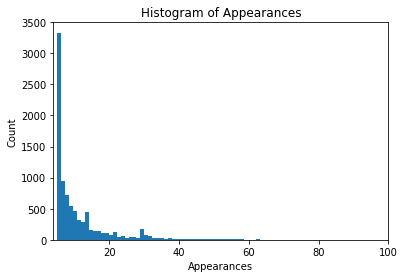

In [16]:
plt.hist(tracks['count'], bins=150)
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(4,100)
plt.show()

Clearly, there's a massive spike at when the Appearances = 5. Let's see how it looks after zooming in a little...

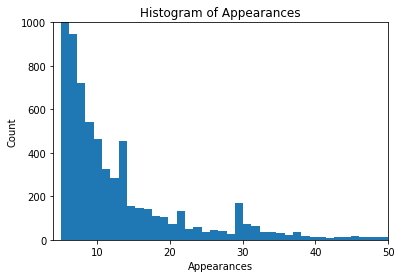

In [17]:
plt.hist(tracks['count'], bins=150)
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(4,50)
plt.ylim(0,1000)
plt.show()

This begs the question, are the top 25% songs appearing the most because of their relevance to quarantine or their overall popularity?

In [18]:
top_25 = tracks[tracks['count']>13]

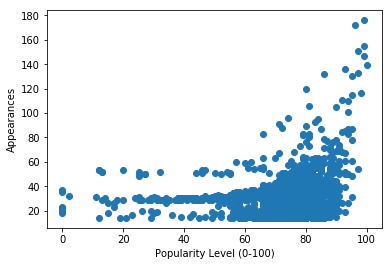

In [19]:
plt.scatter(top_25['popularity'], top_25['count'])
plt.xlabel('Popularity Level (0-100)')
plt.ylabel('Appearances')
plt.show()

Now that we've narrowed down our data set a little, let's see if we have stronger correlations between the two variables.

In [20]:
corrcoef = np.corrcoef(top_25['popularity'], top_25['count'])[0][1]
rank_corrcoef = np.corrcoef(top_25['popularity'].rank(), top_25['count'].rank())[0][1]
spearman_r = spearmanr(top_25['popularity'], top_25['count'])
print('Correlation: {:.4f}'.format(corrcoef))
print('Correlation of ranks: {:.4f}'.format(rank_corrcoef))
print('Spearman r: {:.4f}'.format(spearman_r.correlation))

Correlation: 0.1380
Correlation of ranks: 0.1445
Spearman r: 0.1445


Popularity doesn't seem like the most indicative factor in a song's number of appearances. Let's try a different variable, like song year. Maybe the most played songs will be ones that are recently released and thus trending right now.

Spotify gives us the variable 'release date' as the full day, so we have to filter it down to the year. We did this by creating a new colummn called 'release_year'.

In [70]:
pd.options.mode.chained_assignment = None
for x in range(len(tracks['release_date'])):
    tracks['release_year'][x] = int(tracks['release_date'][x][:4])

KeyError: 'release_year'

In [22]:
plt.hist(tracks['release_year'], bins=150)
plt.title('Histogram of Song Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks()
plt.show()

KeyError: 'release_year'

As we can see, the songs are most commonly from the year 2019, but not 2020. This makes sense that most songs were from 2019, as since we are only a third of the way into the 2020, we can expect to have less songs from 2020. However, given the fact that we are only about a third (when this dataset was taken) into 2020, its interesting to note that the 2020 count is more than half as large as the 2019 count.

## Audio Analysis
We could compare the audio features of each song, using the Top Tracks of 2019 playlist (and/or Top Tracks of Jan 2020, Feb 2020) as a baseline. It is a small sample of what we listened to before quarantine.

Use box plots to compare the main audio features of the Top 2019 songs, and the Top 100 songs of our dataset (and/or the Top 25% of our dataset).

#### Valence

#### Danceability

#### Tempo

#### Speechiness

## Other Ideas
Some other analysis we could do:

- correlation between audio features (valence, danceability, tempo, speechiness) and count

In [23]:
def audio_features(feature):

    x = top_25[[feature]]
    y = top_25[['count']]
    
    model = LinearRegression().fit(x, y)
    m = float(model.coef_)
    b = float(model.intercept_)
    r2 = float(model.score(x, y))

    plt.scatter(x,y)
    plt.plot(x, m*x + b)
    plt.title('Understanding the Top 25%: '+feature)
    plt.xlabel(list(x)[0])
    plt.ylabel(list(y)[0])
    plt.show()
    
    model = LinearRegression().fit(x, y)
    r2 = float(model.score(x, y))

    print("slope: ", round(float(model.coef_),4))
    print("intercept: ", round(float(model.intercept_), 4))
    print("r-squared: ", round(r2, 4))
    print("")

In [24]:
def corr_compare(feature):
    corrcoef = np.corrcoef(tracks[feature], tracks['count'])[0][1]
    rank_corrcoef = np.corrcoef(tracks[feature].rank(), tracks['count'].rank())[0][1]
    spearman_r = spearmanr(tracks[feature], tracks['count'])
    print('Correlation:', round(corrcoef, 4))
    print('Correlation of ranks:', round(rank_corrcoef,4))
    print('Spearman r: {:.4f}'.format(spearman_r.correlation))

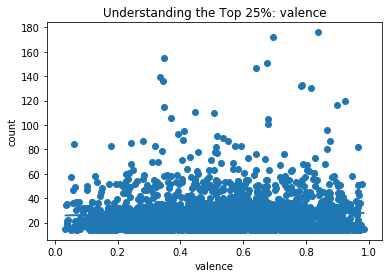

slope:  2.3927
intercept:  25.7532
r-squared:  0.0011

Correlation: 0.0331
Correlation of ranks: 0.03
Spearman r: 0.0300


In [25]:
audio_features('valence')
corr_compare('valence')

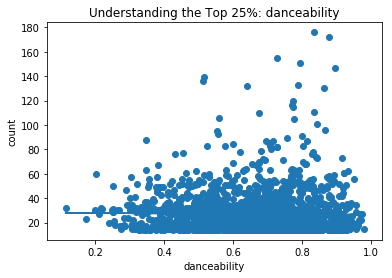

slope:  -1.5495
intercept:  28.062
r-squared:  0.0002

Correlation: 0.001
Correlation of ranks: 0.0172
Spearman r: 0.0172


In [26]:
audio_features('danceability')
corr_compare('danceability')

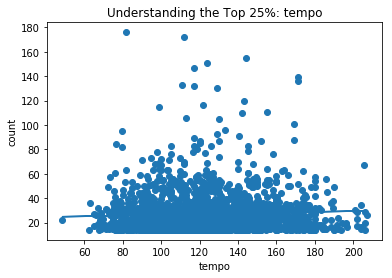

slope:  0.0303
intercept:  23.3463
r-squared:  0.0026

Correlation: 0.0432
Correlation of ranks: 0.0338
Spearman r: 0.0338


In [27]:
audio_features('tempo')
corr_compare('tempo')

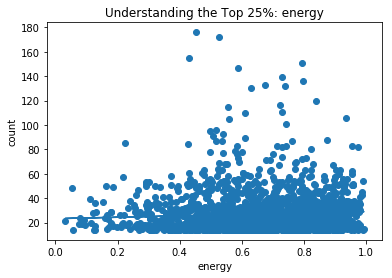

slope:  5.7856
intercept:  23.2215
r-squared:  0.0042

Correlation: 0.0692
Correlation of ranks: 0.0537
Spearman r: 0.0537


In [28]:
audio_features('energy')
corr_compare('energy')

Box plot Section: 

It's important that we remove the outliers because they dramatically effect the look of the box plots.

In [29]:
top_25.columns

Index(['Unnamed: 0', 'uri', 'count', 'name', 'release_date', 'popularity',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature'],
      dtype='object')

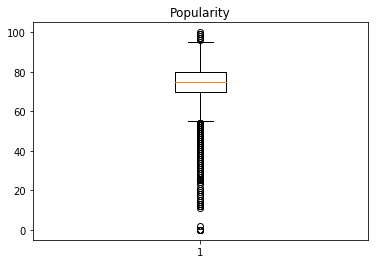

In [80]:
plt.boxplot(top_25['popularity'], meanline = True)
bp = plt.title("Popularity")
plt.show()


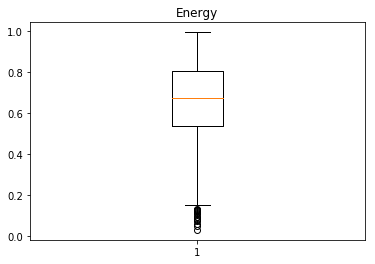

In [62]:
plt.boxplot(top_25['energy'], meanline = True)
plt.title("Energy")
plt.show()

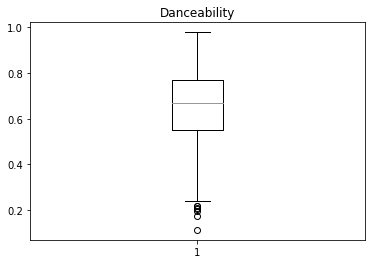

In [54]:
plt.boxplot(top_25['danceability'], meanline = True, )
plt.title("Danceability")
plt.show()

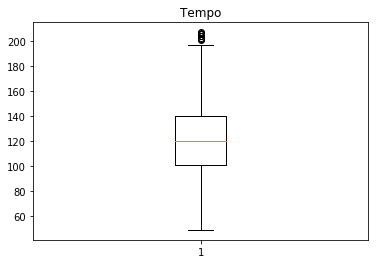

In [57]:
plt.boxplot(top_25['tempo'], meanline = True)
plt.title("Tempo")
plt.show()

Other Ideas to Brainstorm:

Analysis of more explicit: 

Use Binomial or Geometric Models

Use the Poisson model


---
---
<h2> Potential Analysis to include from each Homework </h2>


<h4> HW 1 </h4>

This homework doesn't have much to offer, it was mainly an introduction to plotting and loading csv files - not much to take except graph styling like: <br>
marker = 'x', color ='Red'


<h4> HW 2 </h4>

This section mostly includes probability simulations that aren't applicable, however, potentially could use the binomial or poisson distributions (in log form as below):

The goemetric distribution is defined as: <br>
$p(M) = \prod_{i=1}^n \binom{n}{x_i} p^{x_i}(1-p)^{n-x_i}$


Binomial Function to use: <br>

def binomial(x, n, p): <br>
<blockquote> return comb(n, x) * (p**x) * (1-p)**(n-x) </blockquote>


The log likelihood of a Poisson distribution, with rate parameters $\lambda$, is defined as: <br>
$LL(\lambda|x_{1:n}) = -n\lambda + \sum_{i=1}^n x_i\log(\lambda) - \log(x_i!)$

where $\prod_{i=1}^n$ means product from $i=1:n$.


Potential Log function to use:<br>


def poisson(c, w): 
    <blockquote> result = 0  
    for x in c:    
    result += (x*np.log(w) - ceil(lgamma(x+1))) <br>
    return result + (-(w) * len(c)) </blockquote>

<h4> HW 3 </h4>

This section was mainly about probability, the most important piece of information on this file is defined below:

$$\Pr \left[ A | B \right] = \frac{\Pr \left[ A \cap B \right]}{\Pr \left[ B \right]}$$

Our only potential in this section would be to somehow predict popularity based on the other factors, but there's too many variables. 



<h4> HW 4 </h4>

This homework deals more with gemetric distributions, the simple equation is: 
$$ \Pr(X = k) = (1-p)^{k-1}p. $$   while the log likelihood version is :

$$ LL_{\rm geom}[p | x] = (x-1)\log(1-p)+\log(p)$$

funtion that takes x and p and returns probability: <br>
def geom_dist(x, p):
    <blockquote> prob = (((1-p)**(x-1))*(p))     </blockquote>
        <blockquote>return prob     </blockquote>


The rest of this Hw dealt with REGEX, not too applicable except a fun finish

<h4> HW 5 </h4>

This homework dealt mostly with squared error for models: single-mean vs group-means. We also used a function to see how many counts fell within a certain amount of standard deviations: 


def count_within_range(x, n_std):
    
    crit_check = (abs(x-x.mean()) <= n_std * x.std())
    success_count = crit_check.sum() # you can sum over a boolean vector to get the total number of True values
        # (since Trues are coded as 1s, and Falses are coded as 0s)
    success_prop = success_count/len(x)
    return round(success_prop, 3)
<h4> HW 6 </h4>

In this homework we worked on calculating variance, covariance, correlation, and (slope, intercept, and STD of residuals)

We also used sklearn.linear_model to train a linear regression that predicts (price) or count in our case, given that variable.

<h4> HW 7 </h4>

We've mostly covered hw 7 above.

<h4> HW 8 </h4>

Only new concept was rank correlation, which we've used. 

I think this binomial function is the most clear:

#def binomial_distribution(n, p, k):
    #combination = (comb(n, k))
    #success = (p**k)
    #failure = ((1-p)**(n-k))
    #probability = combination * success * failure
    #return probability